
 #  Probability Distribution

## PETE 2061 Lab 6

<a id='top'></a>

<a id='overview'></a>
# Topics Covered
<font color=blue>
 * [Pandas Utility Functions](#pandas) 
 * [Box Plots](#boxplots)
 * [Generating normal Distribution](#normalDist)
 * [Lognormal Distribution](#lognormalDist)    
</font>
<br>

<a id='pandas'></a>
## Pandas Utility Functions
Import standard packages

In [71]:
import numpy as np
import scipy.stats
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

In [72]:
NpDF = pd.read_csv('Np_demo_data.csv')
NpDF.head()
NpDF.info()
NpDF.max()
NpDF.min()
NpDF.mean()
NpDF.median()
NpDF.mode()
NpDF.quantile([0.25,0.5,0.75])
std1 = float(NpDF.std())
print(f"std is {std1} while variance is {float(NpDF.var())}")
NpDF.quantile([0.1,0.5,0.9])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 1 columns):
Np    20001 non-null float64
dtypes: float64(1)
memory usage: 156.3 KB
std is 1453734.523400044 while variance is 2113344064525.1536


,Np
0.1,7828865.00
0.5,9631836.02
0.9,11541589.26


In [73]:
NpDF.describe()

,Np
count,2.000100e+04
mean,9.661133e+06
std,1.453735e+06
min,4.513287e+06
25%,8.671339e+06
50%,9.631836e+06
75%,1.061819e+07
max,1.549779e+07


** We use scipy to do inverse look-up of the percentile when given a realization of the random variable**

In [74]:
scipy.stats.percentileofscore(NpDF['Np'],1.15e7)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1719: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pct = (np.mean(a_len[idx]) / n) * 100.0


89.61551922403879

<a id='boxplots'></a>
## Box plot 
* A boxplot is a graphic that presents the median, the first and third quartiles, and any outliers that are present in a sample.
* The interquartile range (IQR) is the difference between the third quartile and the first quartile.
* Any point that is more than 1.5 IQR above the third quartile, or more than 1.5 IQR below the first quartile is considered an outlier. This varies from text to text.
* The plot consists of a box whose bottom side is the first quartile and whose top side is the thrid quartile.
* A horizontal line is drawn at the median.
* The outliers are plotted individually and aree indicated by crosses in the figure.
* Extending from the top and bottom of the box are vertical lines called "whiskers".
* The whiskers end at the most extreme data point that is not considered an outlier.

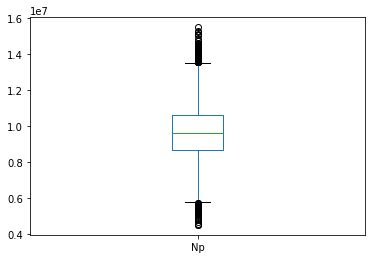

In [75]:
NpDF.plot(kind='box')

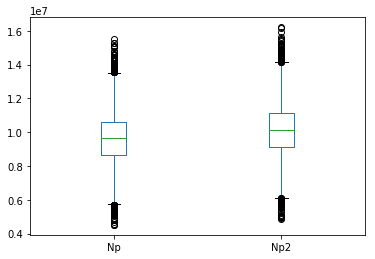

In [76]:
NpDF['Np2'] = NpDF['Np']+1e6*np.random.rand(len(NpDF.index))
NpDF.head()
NpDF.plot(kind='box')

**Using the plot function with argument kind='hist' plots a histogram**

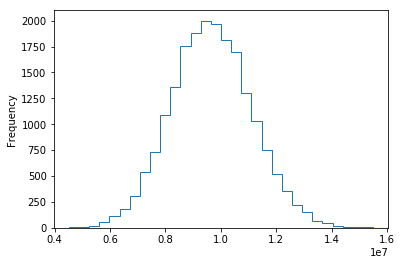

In [77]:
NpDF['Np'].plot(kind='hist',histtype='step',bins=30)  #NpDF['Np'].plot(kind='hist',bins=30)

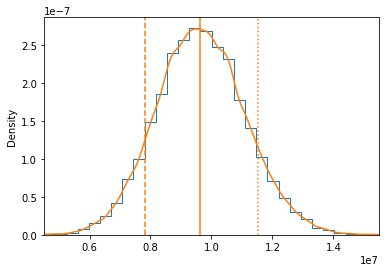

In [78]:
NpDF['Np'].plot(kind='hist', histtype='step', bins=30, density=True) #density=true normalizes the frequency so that it sums to 1
NpDF['Np'].plot.density(bw_method=0.1)
plt.axvline(NpDF['Np'].quantile(0.10), c='C1',linestyle='--')
plt.axvline(NpDF['Np'].quantile(0.50), c='C1')
plt.axvline(NpDF['Np'].quantile(0.90), c='C1',linestyle=':')
plt.axis(xmin=NpDF['Np'].min(),xmax=NpDF['Np'].max())
plt.savefig('outputfile.png')

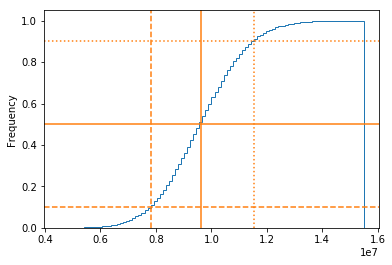

In [79]:
NpDF['Np'].plot(kind='hist', histtype='step',  bins=100, density=True, cumulative=True)
plt.axvline(NpDF['Np'].quantile(0.10), c='C1',linestyle='--')
plt.axvline(NpDF['Np'].quantile(0.50), c='C1')
plt.axvline(NpDF['Np'].quantile(0.90), c='C1',linestyle=':')
plt.axhline(0.10, c='C1',linestyle='--')
plt.axhline(0.50, c='C1')
plt.axhline(0.90, c='C1',linestyle=':')

* This CDF indicates that the probability that the cumulative oil production is less than or equal to 1.15e7 bbls is 90%
* It indicates that the probability that the cumulative oil production is less than or equal to 9.63e6 bbls is 50%
* It indicates that the probability that the cumulative oil production is less than or equal to 7.83e6 bbls is 10%
* These 3 statements can also be reworded as follows:
    * The probability that the cumulative oil production is at least 1.15e7 bbls is 10% (1-90%). Note that at least means greater than or equal to. This is referred to as the $P_{10}$ estimate in reserves management.
    * The probability that the cumulative oil production is at least 9.63e6 bbls is 50% (1-50%). This is referred to as the $P_{50}$ estimate in reserves management.
    * The probability that the cumulative oil production is at least 7.83e6 bbls is 90% (1-10%). This is referred to as the $P_{90}$ estimate in reserves management.

In [80]:
NpDF.quantile([0.1,0.5,0.9])

,Np,Np2
0.1,7828865.00,8.298155e+06
0.5,9631836.02,1.013787e+07
0.9,11541589.26,1.206776e+07


<a id='normalDist'></a>
## Generation of random numbers that are normally-distributed
* You need to specify the mean and standard deviation
* The mean determines where this symmetrical distribution is centered, while the standard deviation determines the spread
* The numpy.random.randn() generates a standard normal distribution, which is a normal distribution with a mean of zero (0) and a standard deviation of unity (1).
    * We account for the correct spread in our normal distribution by multiplying the random number generated using numpy.random.randn() by the standard deviation in the normal distribution
    * We then "re-center" the random number generated using numpy.random.randn() to the mean of our normal distribution by adding mu.
* Normally-distributed Random Number = sigma * np.random.randn(...) + mu

In [81]:
nSamples = 10
std_poro = 0.04
mean_poro = 0.28
poro = std_poro * np.random.randn(nSamples) + mean_poro
poro

array([0.31589348, 0.28482504, 0.30289339, 0.32406854, 0.3000978 ,
       0.28260269, 0.27966152, 0.2715544 , 0.27415865, 0.29592037])

<a id='lognormalDist'></a>
## Lognormal distribution

In [82]:
meanOfLogK = 1.2   #K is permeability, which is typically lognormally-distributed
stdOfLogK = 0.5
numSample = 10000
# First two arguments are the mean and standard deviation of the log of the random variable
K_sample = np.random.lognormal(meanOfLogK , stdOfLogK , numSample)
#K_sample
permDF = pd.DataFrame({'K':K_sample})
permDF.head()

,K
0,1.366617
1,4.657890
2,2.325159
3,2.273697
4,6.337567


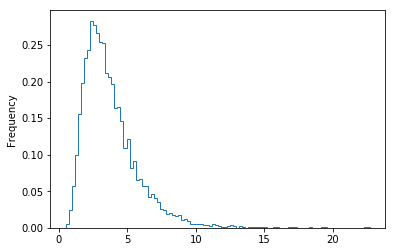

In [83]:
permDF['K'].plot(kind='hist', histtype='step', bins=100, density=True) 

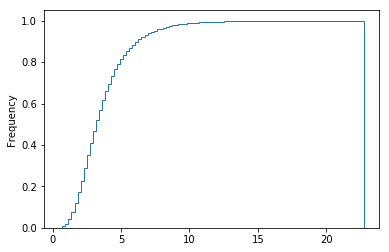

In [84]:
permDF['K'].plot(kind='hist', histtype='step', bins=100, density=True, cumulative=True) 